In [1]:
# Import necessary library for file upload
from google.colab import files
import pandas as pd

# Upload the file
uploaded = files.upload()

Saving diamonds.csv to diamonds.csv


In [3]:
import pandas as pd

# Load the dataset
df = pd.read_csv('diamonds.csv')

# Display basic information about the dataset
df.info()

# Check the first few rows of the dataset
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   x        53940 non-null  float64
 7   y        53940 non-null  float64
 8   z        53940 non-null  float64
 9   price    53940 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,326
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,326
2,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,327
3,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,334
4,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,335


In [4]:
# One-Hot Encoding for categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)

# Check the new shape of the dataset
df_encoded.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   carat          53940 non-null  float64
 1   depth          53940 non-null  float64
 2   table          53940 non-null  float64
 3   x              53940 non-null  float64
 4   y              53940 non-null  float64
 5   z              53940 non-null  float64
 6   price          53940 non-null  int64  
 7   cut_Good       53940 non-null  bool   
 8   cut_Ideal      53940 non-null  bool   
 9   cut_Premium    53940 non-null  bool   
 10  cut_Very Good  53940 non-null  bool   
 11  color_E        53940 non-null  bool   
 12  color_F        53940 non-null  bool   
 13  color_G        53940 non-null  bool   
 14  color_H        53940 non-null  bool   
 15  color_I        53940 non-null  bool   
 16  color_J        53940 non-null  bool   
 17  clarity_IF     53940 non-null  bool   
 18  clarit

In [5]:
from sklearn.preprocessing import StandardScaler

# Select numerical columns
numerical_cols = ['carat', 'depth', 'table', 'x', 'y', 'z']

# Initialize scaler
scaler = StandardScaler()

# Scale the numerical columns
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])

# Check the scaled data
df_encoded.head()


,carat,depth,table,x,y,z,price,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,-1.198168,-0.174092,-1.099672,-1.587837,-1.536196,-1.571129,326,False,True,False,...,False,False,False,False,False,True,False,False,False,False
1,-1.240361,-1.360738,1.585529,-1.641325,-1.658774,-1.741175,326,False,False,True,...,False,False,False,False,True,False,False,False,False,False
2,-1.198168,-3.385019,3.375663,-1.498691,-1.457395,-1.741175,327,True,False,False,...,False,False,False,False,False,False,True,False,False,False
3,-1.071587,0.454133,0.242928,-1.364971,-1.317305,-1.287720,334,False,False,True,...,False,True,False,False,False,False,False,True,False,False
4,-1.029394,1.082358,0.242928,-1.240167,-1.212238,-1.117674,335,True,False,False,...,False,False,True,False,False,True,False,False,False,False


In [6]:
from sklearn.model_selection import train_test_split

# Features (X) and Target (y)
X = df_encoded.drop('price', axis=1)
y = df_encoded['price']

# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize Linear Regression model
lr_model = LinearRegression()

# Train the model
lr_model.fit(X_train, y_train)

# Make predictions
y_pred_lr = lr_model.predict(X_test)

# Evaluate the model
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Linear Regression - Mean Squared Error: {mse_lr}")
print(f"Linear Regression - R^2 Score: {r2_lr}")


Linear Regression - Mean Squared Error: 1288705.4778516747
Linear Regression - R^2 Score: 0.9189331350419387


In [8]:
from sklearn.ensemble import RandomForestRegressor

# Initialize Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest - Mean Squared Error: {mse_rf}")
print(f"Random Forest - R^2 Score: {r2_rf}")


Random Forest - Mean Squared Error: 408643.52249220805
Random Forest - R^2 Score: 0.9742940106772208


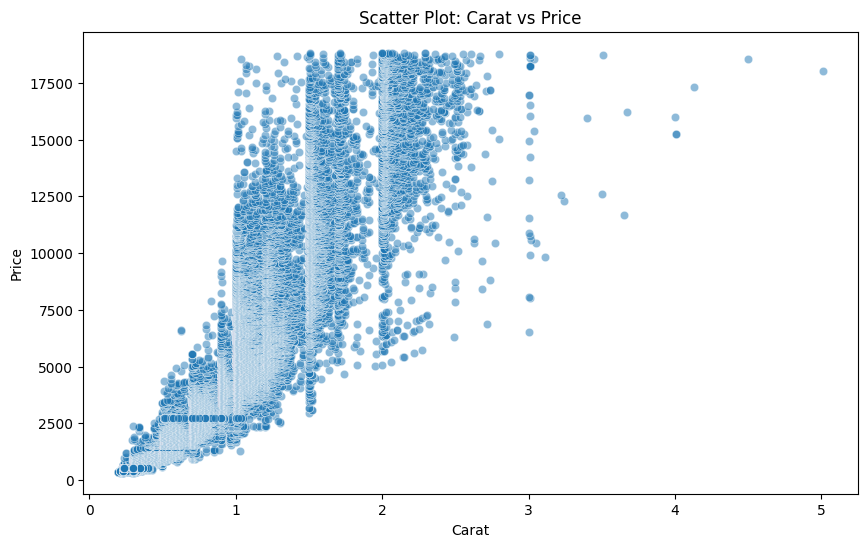

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot: Carat vs Price
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='carat', y='price', alpha=0.5)
plt.title('Scatter Plot: Carat vs Price')
plt.xlabel('Carat')
plt.ylabel('Price')
plt.show()


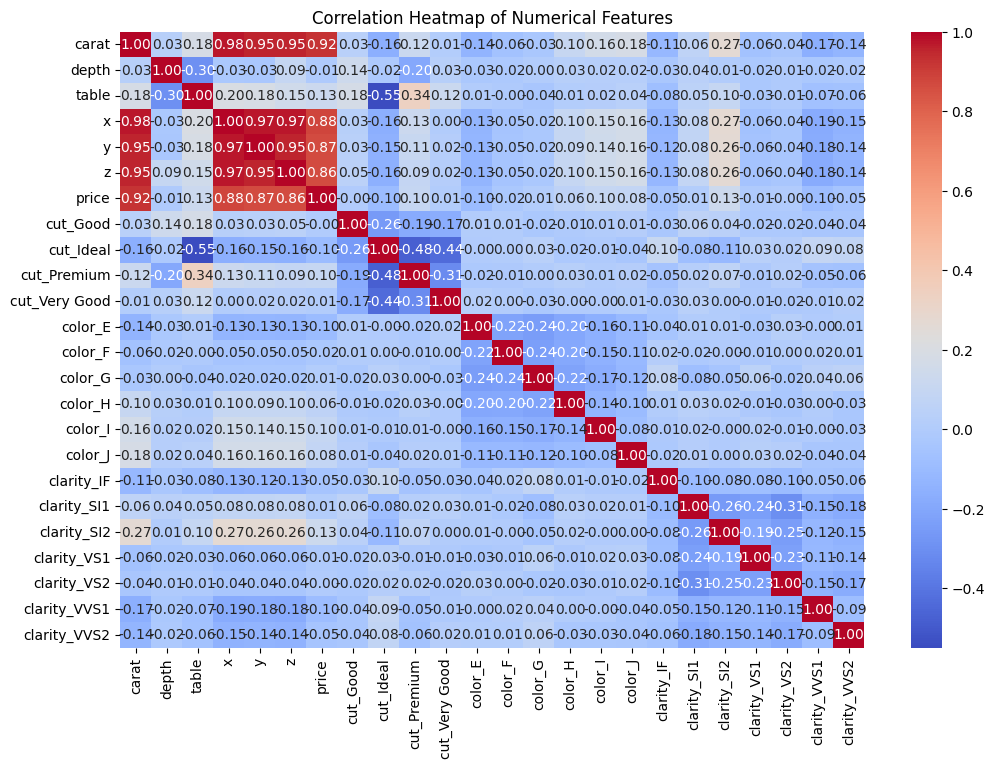

In [10]:
# Calculate correlation matrix
corr_matrix = df_encoded.corr()

# Plotting the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()
